In [1]:
from simtk import openmm, unit
from simtk.openmm import app
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
traj = md.load('obcimplicit.dcd', top='ala2_fromURL.pdb')


atom_indices = np.array(range(22))
frame = md.load_pdb('outputexplicit.pdb',atom_indices=atom_indices,frame=0)
print(frame)

In [3]:
#for atom in traj.topology.atoms:
#    print(atom, atom.index)

In [4]:
def compute_phi_psi(trajectory):
    phi_atoms = [4, 6, 8, 14]
    phi = md.compute_dihedrals(traj, indices=[phi_atoms])[:, 0]
    psi_atoms = [6, 8, 14, 16]
    psi = md.compute_dihedrals(traj, indices=[psi_atoms])[:, 0]
    return phi, psi

In [5]:
def plot_phi_psi(ax, trajectory):
    with open('parameterfile.txt') as f:
        parameters = f.read()
    
    time = trajectory.n_frames*5000*4E-15

    phi, psi = compute_phi_psi(trajectory)
    
    ax.hist2d(phi, psi, 50, norm=LogNorm())
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-np.pi, np.pi)
    ax.set_xlabel(f"$\phi$ \n {parameters}\nTime: {time:.3E} s")
    _ = ax.set_ylabel("$\psi$")

In [6]:
print(traj.n_frames)
time = traj.n_frames*5000*4E-15
print(time)

286294
5.725880000000001e-06


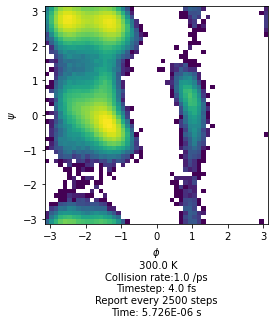

In [7]:
fig, ax = plt.subplots(figsize=(4,4))



plot_phi_psi(ax, traj)
#plt.text()
plt.savefig('Rplots/Rplotobc.png', bbox_inches="tight")
#plt.close()